## DAV 6150 Module 4 Assignment
-by Group Manling Yang, Xiaojia He, Qi Sun

***
## Introduction
The purpose of this study is to examine the factors that can predict the average miles-per-gallon (MPG) for your car in the city. The original data set is comprised of 205 observations and 26 attributes. We'll conduct multiple linear regression to predict the city_mpg.  

**Research Question:**

To what extent do independent variables predict the average miles-per-gallon (MPG) for your car in the city ?

**Variables:**

The original data set includes 10 categorical variables and 16 numerical variables.

There are 25 variables that can be used as independent variables. 

The 'city-mpg' variable will serve as the dependent variable for our regression model. 

**Procedures:**

Here are main procedures of this project:

Step 1: Load data into the data frame from GitHub

Step 2: Exploratory Data Analysis

Step 3: Data Cleaning

Step 4: Feature Engineering and Feature Selection

Step 5: Multiple Linear Regression

Step 6: Conclusion

>For **Step 2**, the main components of EDA include:
>1. Data exploration
2. Check numerical and categorical columns
3. Visualize numerical columns
4. Visualize categorical columns

>For **Step 3**, it consists of 6 stages:
1. Replace "?" with NaN and Show columns with missing values
2. Correct data format - Re-Check numerical and categorical columns
3. Handle missing values 
  - Fill missing values of categorical variables
  - Imputation for Missing Values of numerical variables - SimpleImputer()
  - Combine datasets of numerical and categorical variables after removing missing values
4. Detect Outliers
5. Show relationships between categorical variables and the dependent variabl
6. Show relationships between numberical variables and the dependent variable

>For **Step 4**, we'll perform:
1. Encode categorical data - create dummy variables
2. Split data into training and testing subsets
3. Scaling numerical values using Standard Scale (except dummy variables)
4. Feature Selection by using Correlation coefficients, RFECV, and VIFs:
 - 4a. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds
 - 4b. Select features by using Recursive feature elimination with cross-validation (RFECV)
 - 4c. Reduce features further based on the correlation coefficients from step 4a and VIFs, including Check VIF of all features and Drop feature based on correlation coefficients and VIFs (need all VIFs<10). Then, Set up a final train and test datasets with the best features

>For **Step 5**,we'll perform Multiple Linear Regression.
The procedures of this step include:
- 1. Model selection
- 2. Test the model to predict using the test dataset
- 3. Use Statsmodels summary to get the final model's P-value, $R^2$, intercept, and coefficients.
- 4. Use the final Model for Prediction


**Variable Descriptions:**

1. symboling: the degree which is more risky than its price indicates. It ranges from -3 to 3. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 
2. normalized_losses: Normalized losses are in use as compared to other cars. It is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/specialty, etc.), and represents the average loss per car per year. In this case, the range of normalized_losses is from 65 to 256.
3. make: The makers of the brand. In this dataset, the values of of 'make' include alfa_romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, and volvo.
4. fuel_type: Types of fuels that cars use. The valueas of fuel_type in this dataset  are diesel and gas.
5. aspiration: std, turbo.
6. num_of_doors: numbers of doors for each car (four, two).
7. body_style: types of body type for each car (hardtop, wagon, sedan, hatchback, convertible).
8. drive_wheels: numbers of wheels for each car (4wd, fwd, rwd).
9. engine_location: locations of cars' location (front, rear).
10. wheel_base:the distance between the centers of the front and rear wheels (continuous from 86.6 120.9).
11. length: length of cars (continuous from 141.1 to 208.1).
12. width: width of cars (continuous from 60.3 to 72.3).
13. height: height of cars (continuous from 47.8 to 59.8).
14. curb_weight: the weight of an automobile without occupants or baggage (continuous from 1488 to 4066).
15. engine_type: types of engine (dohc, dohcv, l, ohc, ohcf, ohcv, rotor).
16. num_of_cylinders: numbers of cylinders (eight, five, four, six, three, twelve, two).
17. engine_size: size of engine (continuous from 61 to 326).
18. fuel_system: fuels system that cars use (1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi).
19. bore: size of cylinder for each car (continuous from 2.54 to 3.94).
20. stroke: the distance travelled by the piston in each cycle (continuous from 2.07 to 4.17).
21. compression_ratio: the ratio of the maximum to minimum volume in the cylinder of an internal combustion engine (continuous from 7 to 23).
22. horsepower: engine's power of each car (continuous from 48 to 288).
23. peak_rpm: the maximum revolutions per Minute continuous (from 4150 to 6600).
24. city_mpg: This is our target variable. It is the average miles-per-gallon (MPG) for your car in the city (continuous from 13 to 49). 
25. highway_mpg: the average MPG for your car on the highway. (continuous from 16 to 54).
26. price:  the price of car (continuous from 5118 to 45400).





In [362]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

import missingno as msno 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

***
### Step 1: Load data into the data frame from GitHub

After reading the dataset from Github, we find that there are no columns' names. So, we give the names for each columns base on the information from https://archive.ics.uci.edu/ml/datasets/Automobile.

`.head()` returns the first 5 rows of the dataset. 

In [644]:
# read datasource from Github and add column name
df = pd.read_csv("https://raw.githubusercontent.com/mandy941/DAV-Data-Science/master/Feature%20Selection%20%26%20Dimensionality%20Reduction-w3/M4_Data.csv", header=None,
                names=['symboling', 'normalized_losses', 'make', 'fuel_type','aspiration','num_of_doors',
                      'body_style','drive_wheels','engine_location','wheel_base','length','width',
                      'height','curb_weight','engine_type','num_of_cylinders','engine_size',
                      'fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm',
                      'city_mpg','highway_mpg','price'])

# To display the top 5 rows
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


***
### Step 2: Exploratory Data Analysis

In this case, the steps of Exploratory Data Analysis consist of:
>1. Data exploration
2. Check numerical and categorical columns
3. Visualize numerical columns
4. Visualize categorical columns



#### 1. Data exploration:
`.shape` returns the number of rows by the number of columns for the dataset. My output is (205, 26), meaning the dataset has 205 rows and 26 columns.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

`.dtypes` identifies the Data Types.

`.nunique()` returns the number of unique values for each variable.

`.isnull().sum()` checks missing values for each column.

`.count()` returns the count for each variable.


In [6]:
# check the shape for the dataframe
df.shape

(205, 26)

In [17]:
# statistical summary of numeric variables:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel_base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb_weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine_size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression_ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city_mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway_mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [9]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

# how many '?' values
df_info['?Values']=(df=='?').sum()

df_info

/Users/yangyang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Dtype,Nunique,MissingValues,Count,ZeroValues,?Values
symboling,int64,6,0,205,67,0
normalized_losses,object,52,0,205,0,41
make,object,22,0,205,0,0
fuel_type,object,2,0,205,0,0
aspiration,object,2,0,205,0,0
num_of_doors,object,3,0,205,0,2
body_style,object,5,0,205,0,0
drive_wheels,object,3,0,205,0,0
engine_location,object,2,0,205,0,0
wheel_base,float64,53,0,205,0,0


#### Findings:

>1. The dataset consists of 26 variables and 205 observations.
2. There are no missing values in the data.
3. There are some "?" values.
3. The types of data are object, integer, and float, and some columns are not of the correct data type.
4. There is one variable has negative values, which is symboling. The values of symboling mean the degree to which the auto is more risky than its price indicates. 

#### 2. Check numerical and categorical columns


In [35]:
numerical_columns = []
categorical_columns = []

for i in df.columns[:]:
    if(df[i].dtype=='object'):
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print('Numerical variables:',numerical_columns)
print('Categorical variables:',categorical_columns)

Numerical variables: ['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'compression_ratio', 'city_mpg', 'highway_mpg']
Categorical variables: ['normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']


#### Findings:
> 1. We can know the numerical variables of the original dataset are 10 attributes, including 'symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'compression_ratio', 'city_mpg', 'highway_mpg'.
2. The categorical variables of the original dataset include 16 attributes, including  'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price'.

#### 3. Visualize numerical columns

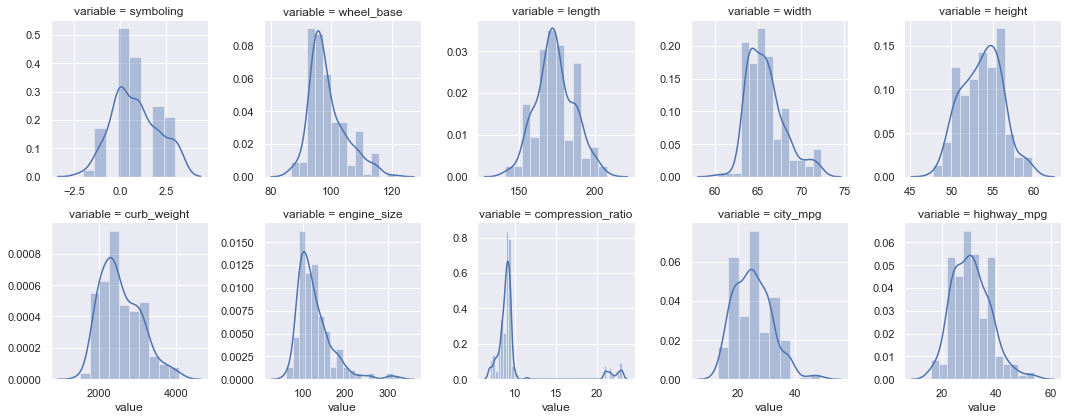

In [40]:
# Distributions for each of numerical variables.
nd = pd.melt(df[numerical_columns])
n1 = sns.FacetGrid (nd, col='variable', col_wrap=5, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

#### Findings: 
>From this visualization, we can see that almost every attribute fit normal distribution except compression_ration even though they are slightly skewed. In addition, most cars have lower degrees of symboling which are riskier than their price indicates.

#### 4. Visualize categorical columns

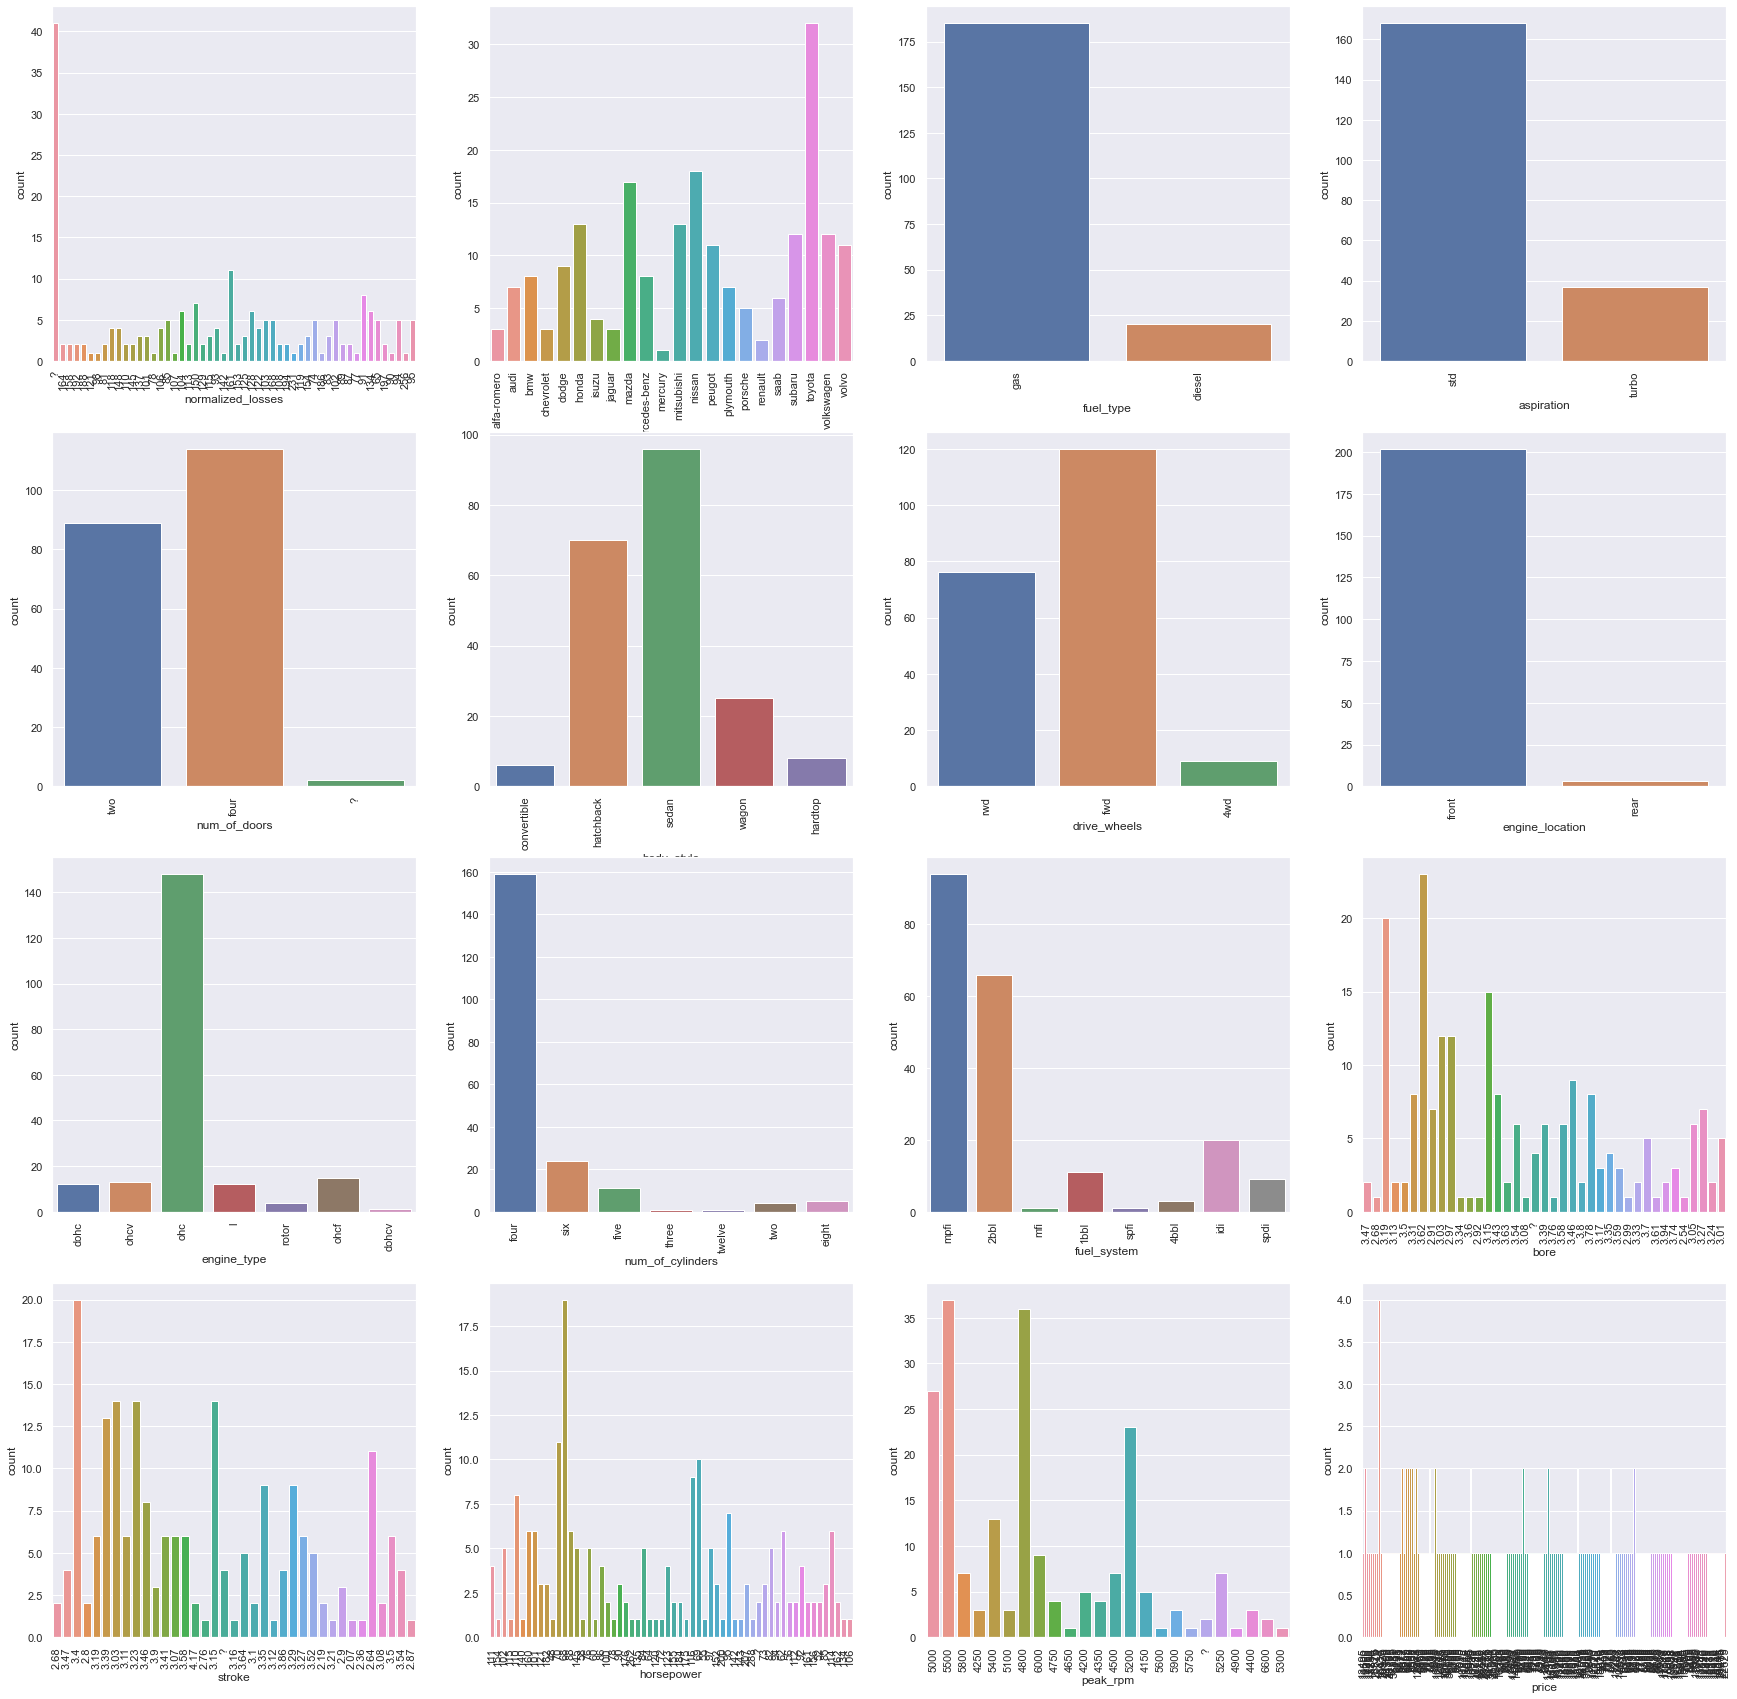

In [50]:
# create the bar chart for each categorical columns
fig, ax = plt.subplots(4, 4, figsize=(30, 30))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

#### Findings: 
>1. Consider we will create a linear regression model later, we should convert categorical variables from string to numerical by creating dummy variables. 
2. The most popular cars are gas for fuel types, ohc for engine type, mph for fuel system.

***
### Step 3: Data Cleaning
1. Replace "?" with NaN and Show columns with missing values
2. Correct data format - Re-Check numerical and categorical columns
3. Handle missing values 
  - Fill missing values of categorical variables
  - Imputation for Missing Values of numerical variables - SimpleImputer()
  - Combine datasets of numerical and categorical variables after removing missing values
4. Detect Outliers
5. Show relationships between categorical variables and the dependent variabl
6. Show relationships between numberical variables and the dependent variable


#### 1. Replace "?" with NaN and Show columns with missing values

In many columns, data is represented by symbol '?'. We'll replace '?' with Nan, which is helful for the further analysis.

In [147]:
# replace '?' with NaN
df02 = df.replace('?',np.NAN) 
# Show missing value
miss = df02.isnull().sum()
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

num_of_doors          2
horsepower            2
peak_rpm              2
bore                  4
stroke                4
price                 4
normalized_losses    41
dtype: int64

In [151]:
# check the numbers of completed rows without missing values
df02.shape[0] - df02.isnull().sum(axis=0).shape[0]

179

Text(0.5, 1.0, ' Percents of nonmissing data with missingno')

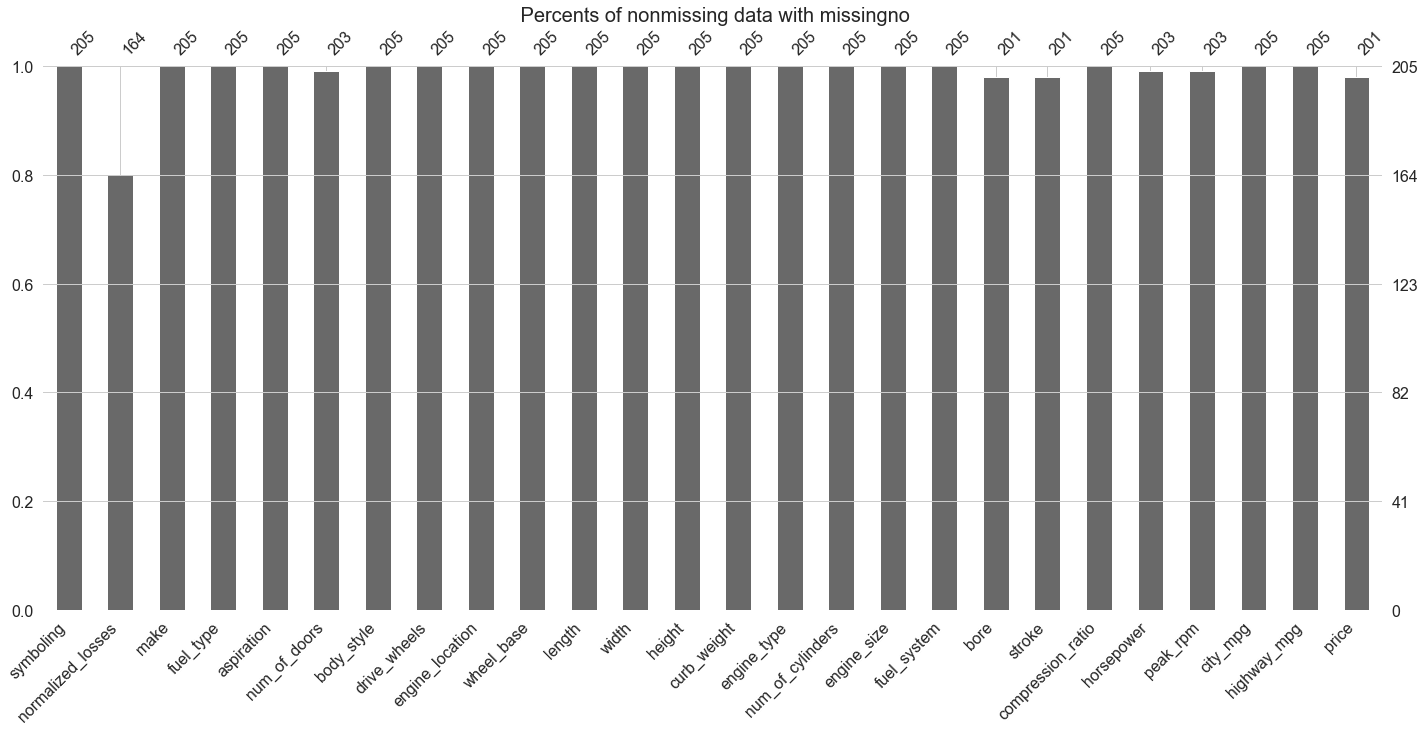

In [54]:
# create the bar charts to show percents of nonmissing databy missingo function
msno.bar(df02)
plt.title(' Percents of nonmissing data with missingno',fontsize=20)

#### Findings:

1. There are 7 explanatory variables have missing values, including normalized_losses, num_of_doors, bore, storke, horsepower, peak_rpm, and price.
2. The attributes of normalized_losses, bore, storke, and price  have approximately 20% missing values.
3. There are 179 completed rows without any missing values.


#### 2. Correct data format 

Some columns do not show the correct data type. Numerical variables should have type 'float' or 'int'. 

In this case, the range of normalized-losses is from 65 to 256.

The range of bore is from 2.54 to 3.94.

The range of stroke is from 2.07 to 4.17.

The range of horsepower is from 48 to 288.

The range of peak-rpm is from 4150 to 6600.

The range of price is from 5118 to 45400.  

For the columns above, they are shown as 'object' type, but we expect them to be the 'float' or 'int'. So we'll use the `.astype()` method to convert these varaibles.

For the variable if symboling, it is numerical and discrete data. To be better understant analyze it, we decided to transfer it into categorical data type. 


In [148]:
# convert data with object type to float
df02[['bore', 'stroke']] = df02[['bore', 'stroke']].astype('float')
df02[['normalized_losses', 'horsepower','price','peak_rpm']] = df02[['normalized_losses','horsepower','price','peak_rpm']].astype("float")


In [280]:
# convert symboling variable to string
df02[['symboling']] = df02[['symboling']].astype('str')

In [281]:
# recheck the data info after transformation
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

**Re-Check numerical and categorical columns - Compare**

In [282]:
# show the original columns 

numerical_columns = []
categorical_columns = []

for i in df.columns[:]:
    if(df[i].dtype=='object'):
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print('Original Numerical variables:',numerical_columns)
print('Original Categorical variables:',categorical_columns)

Original Numerical variables: ['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'compression_ratio', 'city_mpg', 'highway_mpg']
Original Categorical variables: ['normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']


In [283]:
# show the columns after converting 

numerical_columns_new = []
categorical_columns_new = []

for i in df02.columns[:]:
    if(df02[i].dtype=='object'):
        categorical_columns_new.append(i)
    else:
        numerical_columns_new.append(i)

print('Converted Numerical variables:',numerical_columns_new)
print('Converted Categorical variables:',categorical_columns_new)

Converted Numerical variables: ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
Converted Categorical variables: ['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']


#### Findings: 

> 1. All the columns have been converted to the types that we expect.
2. After converting, there are 15 Numerical variables and 11 Categorical variables.

#### 3. Handle missing values

**3a. Fill missing values of categorical variables**

We found that only 'num_of_doors' has misssing values among all the categorical variables.


We also found that the num-of-doors has missing values in two rows, and both of them are belong to the sedan body_style. One is dodge, and the other one mazda. 

We'll check the mode of dodge's sedan and fill the missing row with dodge's sedan mode. And we'll check the mode of mazda's sedan and fill this missing with mazda's sedan mode. 


In [284]:
# create a new dataframe 
df03 = df02.copy()

In [285]:
# check out these rows that contain the missing values in num-of-doors
df03[df03['num_of_doors'].isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [286]:
# check out which door type is the most common type in the sedan cars made by dodge
df03.loc[(df03['body_style'] == 'sedan') & (df03['make'] == 'dodge')]['num_of_doors'].mode()

0    four
dtype: object

In [287]:
# check out which door type is the most common type in the sedan cars made by mazda
df03.loc[(df03['body_style'] == 'sedan') & (df03['make'] == 'mazda')]['num_of_doors'].mode()

0    four
dtype: object

In [288]:
# both the modes calculated above are 4.
# fill the missing with 4
df03['num_of_doors']= df03['num_of_doors'].fillna('four')

In [289]:
# Show the rest of missing values
miss02 = df03.isnull().sum()
miss02 = miss02[miss02 > 0]
miss02.sort_values(inplace=True)
miss02

horsepower            2
peak_rpm              2
bore                  4
stroke                4
price                 4
normalized_losses    41
dtype: int64

In [290]:
# group by the num_of_doors column
df03.groupby(['num_of_doors']).count()

,symboling,normalized_losses,make,fuel_type,aspiration,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
num_of_doors,,,,,,,,,,,,,,,,,,,,,
four,116,96,116,116,116,116,116,116,116,116,...,116,116,116,116,116,115,115,116,116,115
two,89,68,89,89,89,89,89,89,89,89,...,89,89,85,85,89,88,88,89,89,86


#### Results:

> 1. All missing values in num_of_doors column are filled.
2. There are only two types of doors(2,4), and the data type is int.

**3b.Imputation for Missing Values of numerical variables - `SimpleImputer()`**

We'll use __`SimpleImputer()`__ to impute other numerical missing values.

__SimpleImputer pre-processing__: The scikit-learn library provides the SimpleImputer pre-processing class that can be used to replace missing values.

It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode). The SimpleImputer class operates directly on the NumPy array instead of the DataFrame.

Reference: 
https://www.geeksforgeeks.org/ml-handle-missing-data-with-simple-imputer/

Although there are different techniques that we can use to impute the missing values, in this case we choose to use the mean value to impute the data. Since our missing values only occupied a small part in out data set, so the mean value is more accurate to impute them.


In [655]:
# create a new dataframe with only numerical variables
df04 = df03[numerical_columns_new]

In [650]:
# imputing missing values using scikit-learn
from numpy import nan
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

# retrieve the numpy array
values = df04.values
# define the imputer with "mean" value
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

Missing: 0


In [656]:
# transfer the array to dataframe
df05 = pd.DataFrame(transformed_values)  

df05.columns = ["normalized_losses","wheel_base","length","width","height","curb_weight",
                   "engine_size","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg",
                   "highway_mpg","price"]
df05.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


#### Compare the data summery before and after the data imputation

In [658]:
# show the original numerical variables with missing valuaes

df02.describe().T

,count,mean,std,min,25%,50%,75%,max
normalized_losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [660]:
# show the numerical variables after imputing the missing valuaes

df05.describe().T

,count,mean,std,min,25%,50%,75%,max
normalized_losses,205.0,122.000000,31.681008,65.00,101.00,122.00,137.00,256.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329751,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255423,0.313597,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


#### Findings: 
>We found that the difference before and after the imputing is not too much. Only normalized_losses and price have some obviuos difference. Because normalized_losses has more missing values(25%), and the value of the price is relatively large.
1. price: its standard deviation becomes to 7868 from 7947 which also means the data is less spread. And the Percentile of 25%, 50% and 75% qualifiers become to 7788,10595,16500 from 7775,10295,16500 separately.
2. normalized_losses: its standard deviation becomes to 32 from 35 which means the data is less spread as we filled the data. And the Percentile of 25%, 50% and 75% qualifiers become to 101,122,137 from 94,115,150 separately.

**3c. Combine datasets of numerical and categorical variables after removing missing values**

To deal with missing values, we've divided the whole dataset into two parts: one with only numberial variables and one with only categorical variables. Now, we'll use `concat()` function to combine these two dataframes with the same index.

In [661]:
# categorical variables without missing value
df06 = df03[categorical_columns_new]
print(df06.info())

# dataset consists of numberical variables without missing value
print(df05.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   symboling         205 non-null    object
 1   make              205 non-null    object
 2   fuel_type         205 non-null    object
 3   aspiration        205 non-null    object
 4   num_of_doors      205 non-null    object
 5   body_style        205 non-null    object
 6   drive_wheels      205 non-null    object
 7   engine_location   205 non-null    object
 8   engine_type       205 non-null    object
 9   num_of_cylinders  205 non-null    object
 10  fuel_system       205 non-null    object
dtypes: object(11)
memory usage: 17.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  205 non-null    float64
 

In [662]:
# combine these two together

df07 = pd.concat([df05, df06], axis=1)
df07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  205 non-null    float64
 1   wheel_base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb_weight        205 non-null    float64
 6   engine_size        205 non-null    float64
 7   bore               205 non-null    float64
 8   stroke             205 non-null    float64
 9   compression_ratio  205 non-null    float64
 10  horsepower         205 non-null    float64
 11  peak_rpm           205 non-null    float64
 12  city_mpg           205 non-null    float64
 13  highway_mpg        205 non-null    float64
 14  price              205 non-null    float64
 15  symboling          205 non-null    object 
 16  make               205 non

Text(0.5, 0, 'Dataset with no missing')

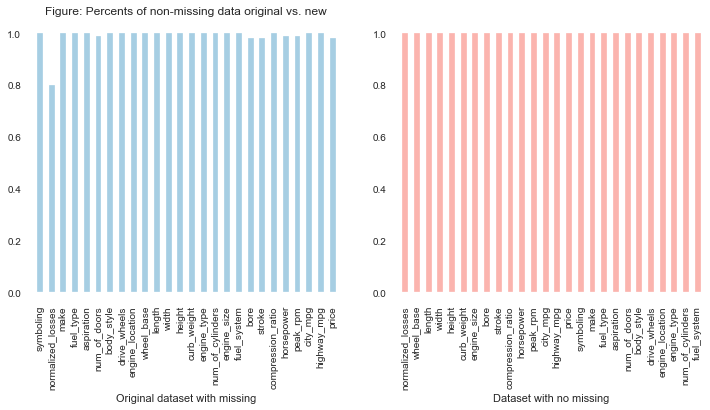

In [663]:
# compare the Percentage of non-missing data with pandas.
plt.figure(figsize=(12,5))

plt.subplot(121)
(1 - df02.isnull().mean()).abs().plot(kind='bar',colormap='Paired')
plt.xlabel('Original dataset with missing')
plt.title('Figure: Percents of non-missing data original vs. new')

plt.subplot(122)
(1 - df07.isnull().mean()).abs().plot(kind='bar',colormap='Pastel1')
plt.xlabel('Dataset with no missing')

#### Results:

> All the missing values have been filled, and there is no missing values in the new dataframe.

#### 4. Detect Outliers

We will use histogram to discover outliers of numberical variables. If there is an outlier it will plot as a point in boxplot but other populations will be grouped together and display as boxes. we will use `sns.countplot` for categorical variables.

Below is the box plots of all features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x16d425450>,
      dtype=object)

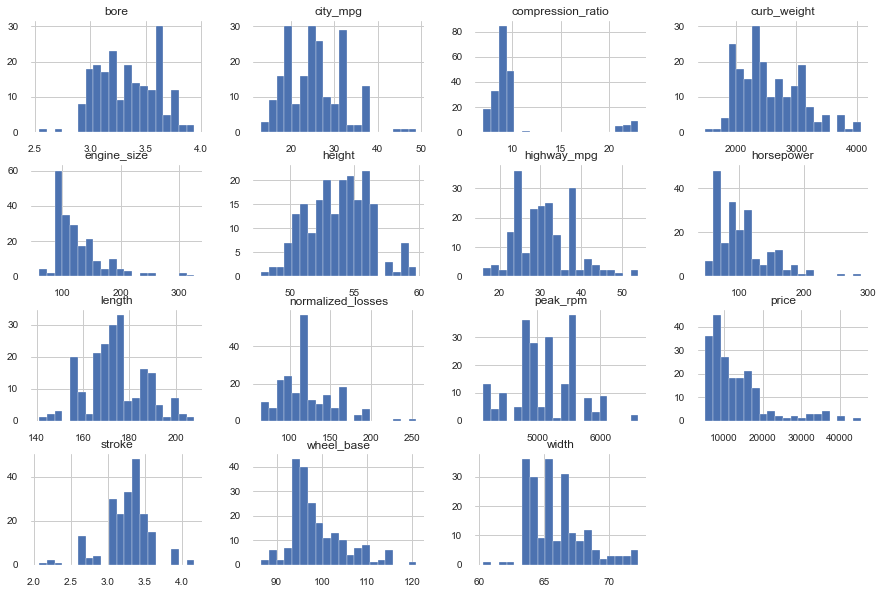

In [664]:
# create histogram for numerical columns
df07.hist(figsize=(15, 10), bins=20, xlabelsize=10, ylabelsize=10)

#### Findings: 
>1. From this visualization, we can obviously see that the compression_ration, engine_size, horsepower, normalized_losses,price and wheel_base variables are strongly right skewed.
2. Since the scales of the numerical variables are different, we'll not remove outliers here.

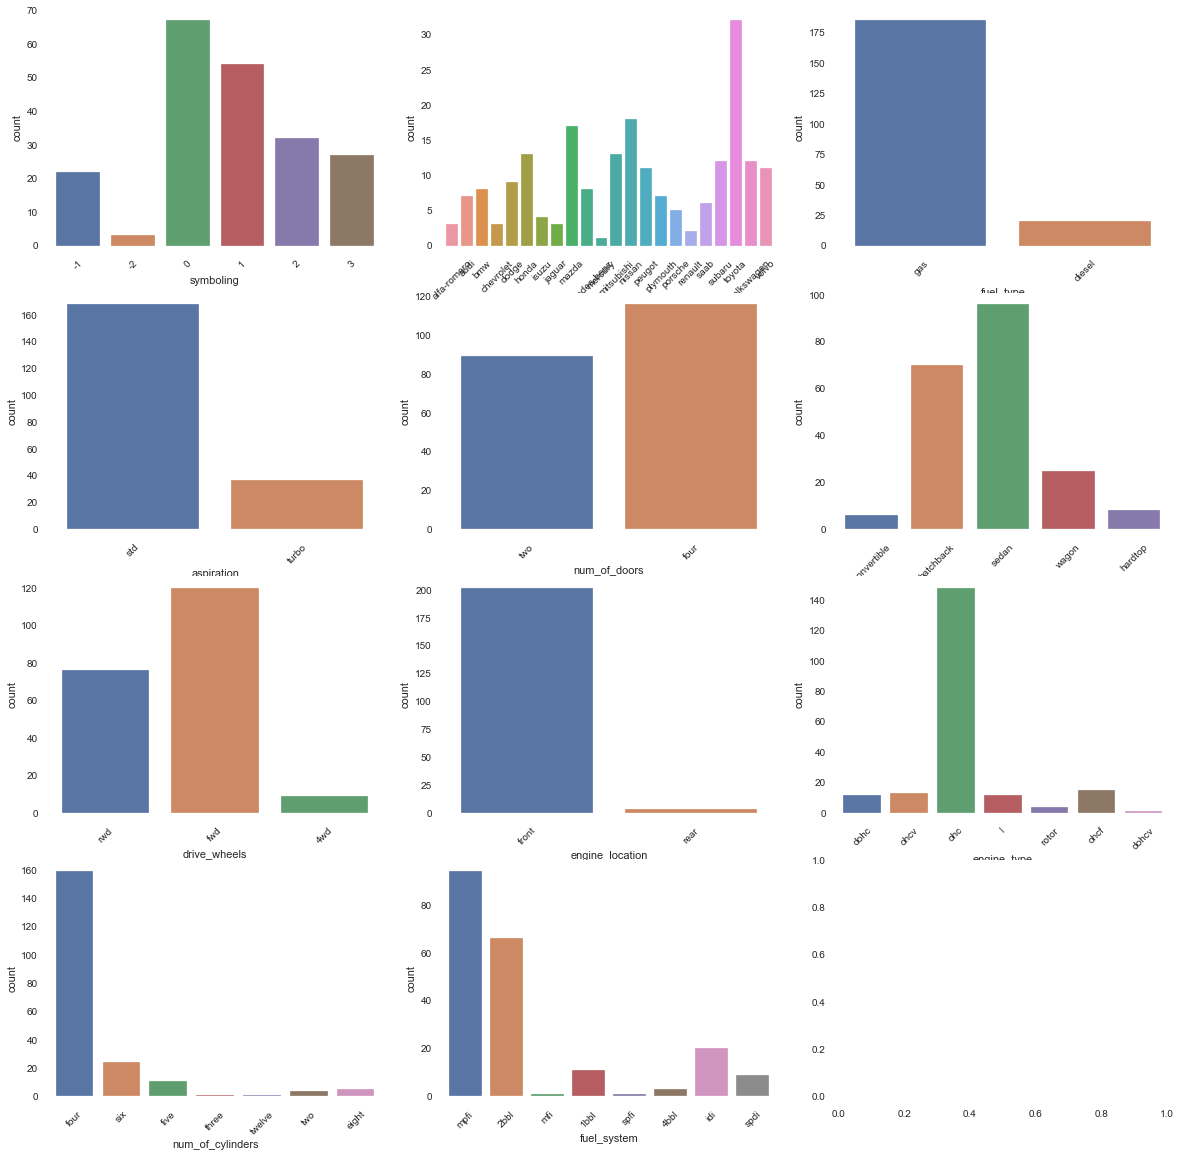

In [665]:
# plot categorical variables bar chart 
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for variable, subplot in zip(categorical_columns_new, ax.flatten()):
    sns.countplot(df06[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

#### Findings: 
>1. These charts clearly show all the categories for every variable, and we can easily distinguish which category is the most common one and which is not:
>2. For example, 0 is the most common value for the sampling variable, which has about 65 cases in this dataset. But it only has 3 cases that have -2 value. For the body_style variable, we can see the sedan is the most common car type, which has almost 100 cases, but convertible only has 5 cases.


#### 5. Show relationships between categorical variables and the dependent variable

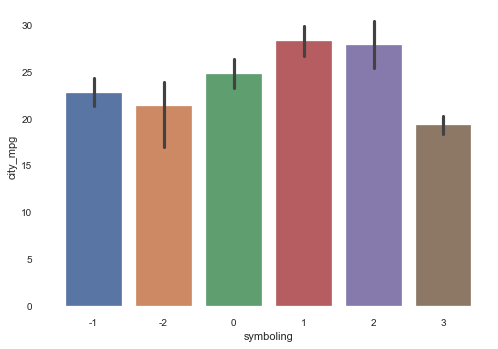

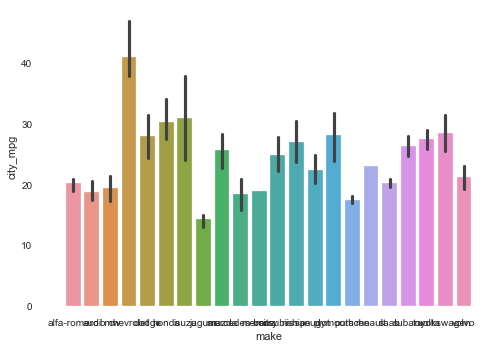

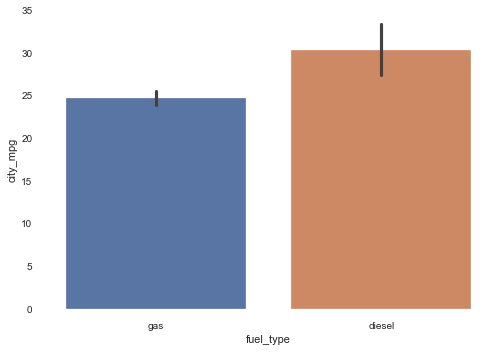

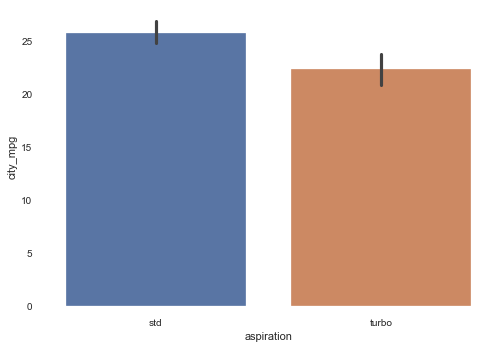

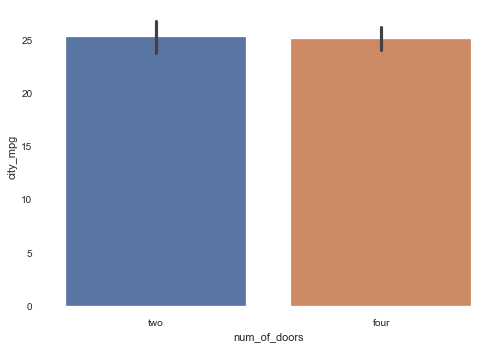

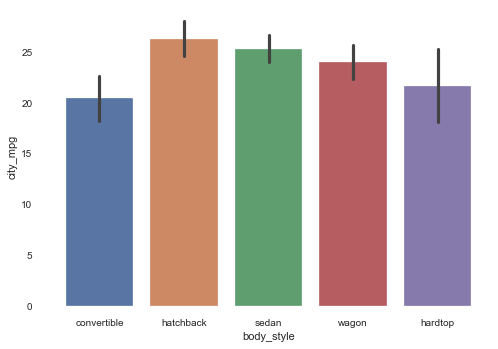

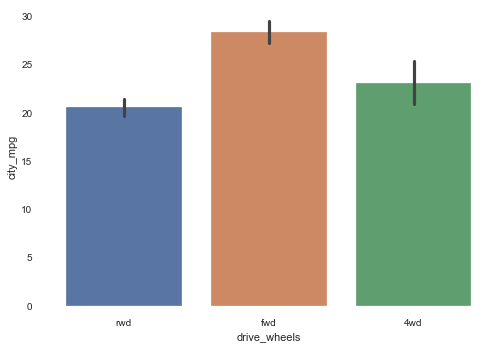

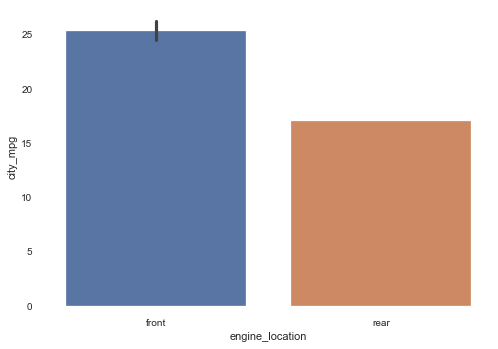

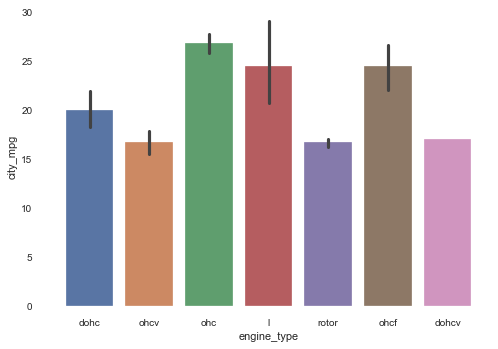

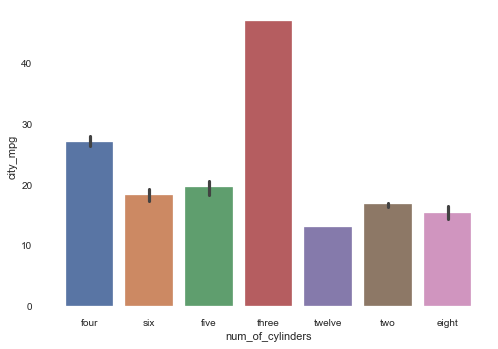

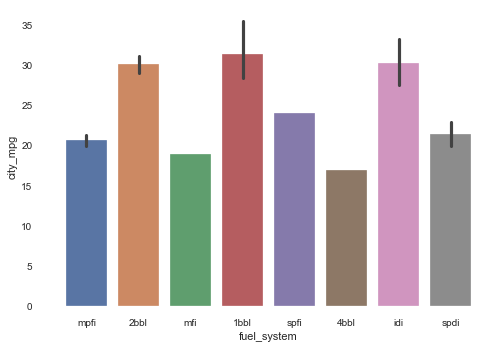

In [666]:
# create the bar chart for categorical variable
for i in categorical_columns_new:
    plt.figure()
    sns.barplot(x=i , y='city_mpg', data=df07)
    plt.plot()

#### Findings:

>1. To summary the relationship of these plots, we can know that the number of doors doesn't affect the city_mpg. Since the 2 and 4 doors have almost the city_mpg values. 
2. Combining other features, the car with the '1' value in symboling, making by Chevrolet, with diesel fuel type, std aspiration, hatchback body style, fwd drive wheels, front engine location, ohc engine type, three cylinders and 1bbl fuel-system would have the highest city_mpg.  

#### 6. Show relationships between numberical variables and the dependent variable

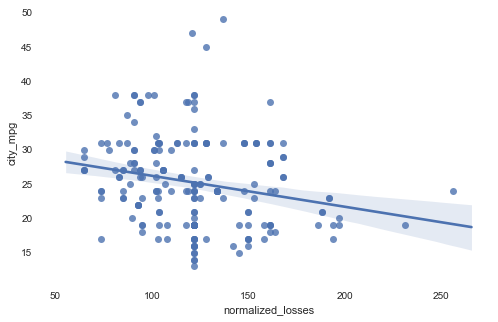

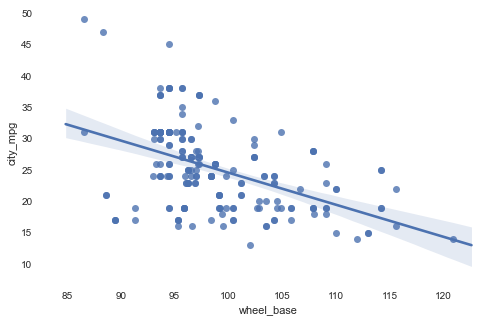

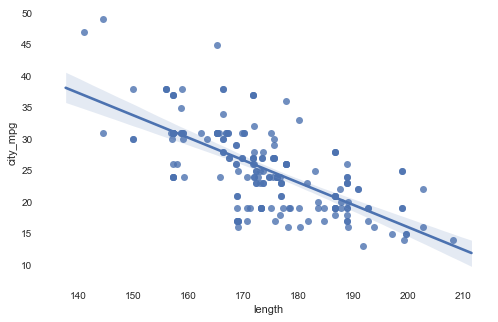

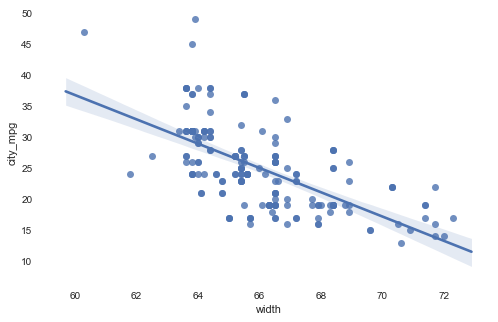

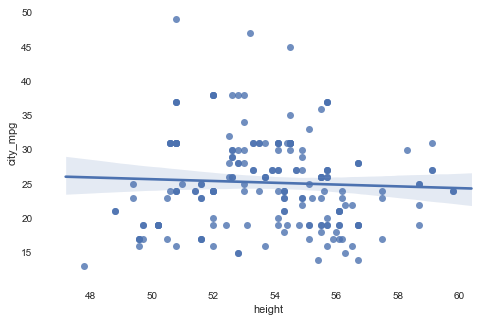

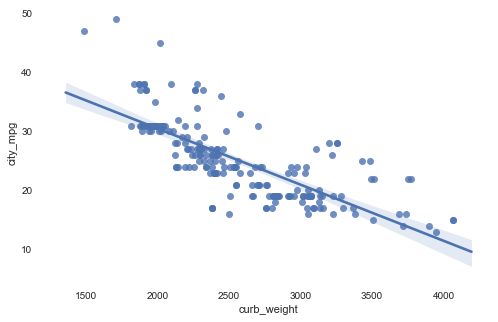

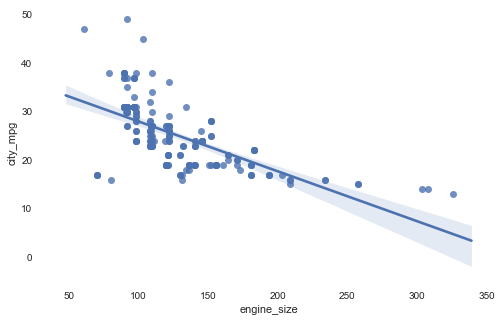

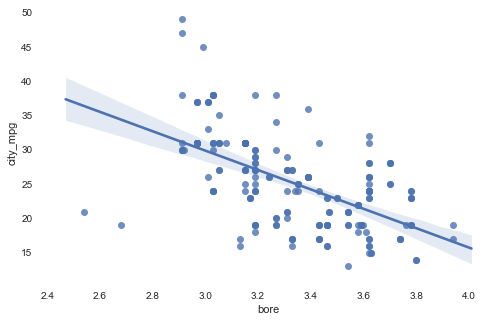

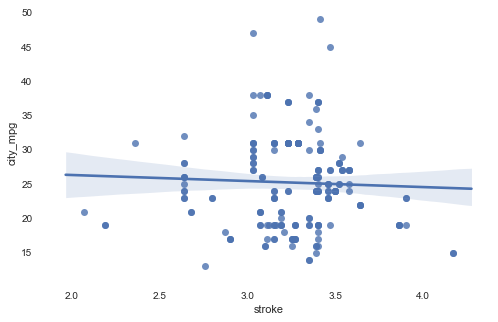

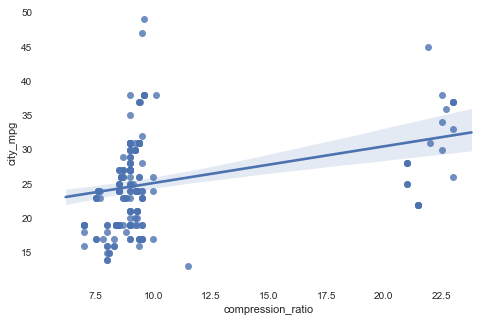

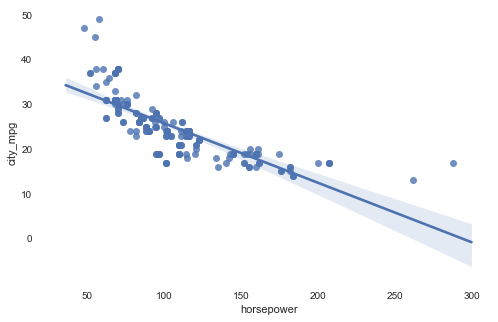

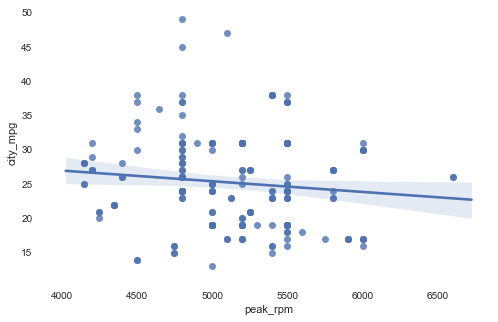

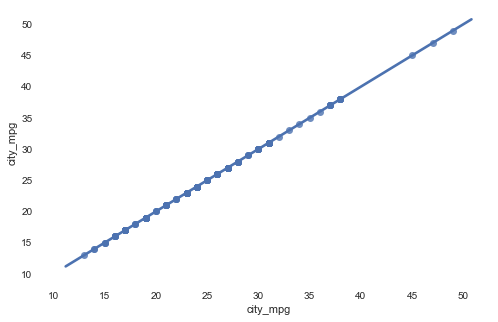

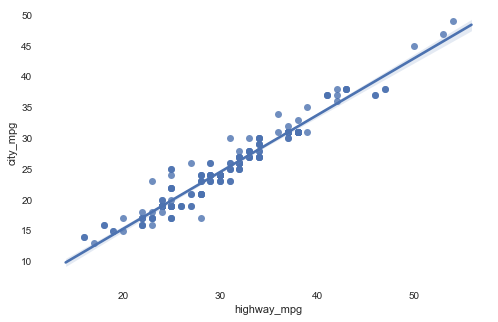

In [668]:
# show the liner regression plots of the numerical variables

for i in numerical_columns_new[:-1]:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=i, y='city_mpg', data=df07)
    plt.plot()

#### Findings:

>1. Most of the numerical variables like normalized_losses, wheel_base, length, width, height, curb_weight, engine_size, bore, stroke, horsepower, peak_rpm have the negative replationship with the city_mpg response variable, which means when the values of these variables increase the city_mpg decrese. 
2. For compression_ratio and highway_mpg, they have the positive relationship with the city_mpg which means when they increse the city_mpg increrse too.
3. For length, width, curb_weight, engine_size, bore, horsepower and highway_mpg variables, we can see that these straight lines have a distinct tilt, which means they have a big influence on our city_mpg variable. When these explanatory variables change, we can see an obvious change on city_mpg. On the contrary, the height and stroke line look like a horizontal line which means they do not affect city_mpg too much. we won't see obvious change even we have a big on change height and stroke.


***
### Step 4: Feature Engineering and Feature Selection

For this step, we'll perform:

1. Encode categorical data - create dummy variables

2. Split data into training and testing subsets

3. Scaling numerical values using Standard Scale (except dummy variables)

4. Feature Selection by using Correlation coefficients, RFECV, and VIFs:
 - 4a. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds
 - 4b. Select features by using Recursive feature elimination with cross-validation (RFECV)
 - 4c. Reduce features further based on the results from the step 4a and VIFs, including Check VIF of all features and Drop feature based based on VIF. Then, Set up a final train and test datasets with the best features


#### 4.1 Encode categorical data - create dummy variables

We'll create dummy variables for categorical data and exclude the first dummy column.

We should represent categorical data numerically, but we can't simply code by using `LabelEncoder`, for example, for drive_wheels 0=4wd,1=fwd,2=rwd, because that would imply an ordered relationship between rwd and fwd (and thus rwd is somehow "twice" the fwd category).

Therefore, we'll create dummy features for categorical data by calling the `pd.get_dummies()` function.

>Steps:
1. We'll define the list of categorical features that we want to process.
2. We'll create dummy variables using `get_dummies()`, and we'll exclude the first dummy column to avoid dependency among the variables by using `drop_first=True`.
3. Results: the predictor variables increased from 25 to 69 after creating dummy variables.


In [669]:
# First we define the list of categorical features that we will want to process:
cat_columns = ['symboling', 'make','fuel_type', 'aspiration','num_of_doors','body_style','drive_wheels',
              'engine_location','engine_type','num_of_cylinders','fuel_system']

In [670]:
# create dummy variables using get_dummies, then exclude the first dummy column
df_processed = pd.get_dummies(df07, prefix_sep="_",
                              columns=cat_columns, drop_first=True)
df_processed.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [671]:
# size of the dataset
df_processed.shape

(205, 70)

In [672]:
# check columns
df_processed.columns

Index(['normalized_losses', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'symboling_-2', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel_type_gas', 'aspiration_turbo', 'num_of_doors_two',
       'body_style_hardtop', 'body_style_hatchback', 'body_style_sedan',
       'body_style_wagon', 'drive_wheels_fwd', 'drive_wheels_rwd',
       'engine_location_rear', 'engine_type_dohcv', 'engine_type_l',
       'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv',
 

#### 4.2 Split data into training and testing subsets

Before doing feature selection,we'll split data into training and testing subsets by using the `train_test_split` function. The test_size=0.3 inside the function indicates the percentage of the data that should be held over for testing. It’s 70/30, 30% of the data for testing.

In [673]:
# Create X and y
X = df_processed.drop(['city_mpg'], axis=1)
y = df_processed[['city_mpg']]

# Now split the data into training and testing subsets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

X_train.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
204,95.0,109.1,188.8,68.9,55.5,3062.0,141.0,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
137,104.0,99.1,186.6,66.5,56.1,2847.0,121.0,3.54,3.07,9.0,...,0,0,0,0,0,0,0,1,0,0
45,122.0,94.5,155.9,63.6,52.0,1909.0,90.0,3.03,3.11,9.6,...,0,0,0,1,0,0,0,0,0,0
187,94.0,97.3,171.7,65.5,55.7,2319.0,97.0,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0
33,101.0,93.7,150.0,64.0,52.6,1940.0,92.0,2.91,3.41,9.2,...,0,0,0,0,0,0,0,0,0,0


In [674]:
# check the results
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (143, 69) (143, 1)
Testing dataset shape: (62, 69) (62, 1)


#### 4.3 Scaling numerical values using Standard Scale (except dummy variables)

Since some variables have different scales, we'll use `StandardScaler` to remove the mean and scale the data to unit variance.

Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

We'll use `StandardScaler` for the train dataset, then do the same to the test dataset.


In [675]:
# set up numerical variables
numerical_columns_new02 =['normalized_losses',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'highway_mpg',
 'price']

In [676]:
# disable the 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None

#Feature Scaling on thr train dataset
sc = StandardScaler()

for i in numerical_columns_new02[:-1]:
    X_train[i] = X_train[i].astype('float64')
    X_train[i] =  sc.fit_transform(X_train[i].values.reshape(-1,1))
    
X_train.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
204,-0.858392,1.594969,1.163497,1.379929,0.683298,0.878505,0.276383,1.614745,-0.351251,-0.198291,...,0,0,0,0,0,0,0,1,0,0
137,-0.568507,0.006775,0.987729,0.254741,0.924165,0.483783,-0.175048,0.743539,-0.618670,-0.317523,...,0,0,0,0,0,0,0,1,0,0
45,0.011262,-0.723795,-1.465029,-1.104861,-0.721758,-1.238306,-0.874767,-1.107773,-0.484960,-0.174445,...,0,0,0,1,0,0,0,0,0,0
187,-0.890601,-0.279100,-0.202697,-0.214087,0.763587,-0.485580,-0.716766,-1.180374,0.484433,3.020958,...,0,0,0,0,0,1,0,0,0,0
33,-0.665136,-0.850850,-1.936406,-0.917330,-0.480891,-1.181393,-0.829624,-1.543376,0.517861,-0.269830,...,0,0,0,0,0,0,0,0,0,0


In [677]:
# disable the 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None

#Feature Scaling on th train dataset
sc = StandardScaler()

for i in numerical_columns_new02[:-1]:
    X_test[i] = X_test[i].astype('float64')
    X_test[i] =  sc.fit_transform(X_test[i].values.reshape(-1,1))
    
X_test.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
32,-0.664067,-0.836810,-2.001580,-0.834270,-0.415714,-1.456217,-1.285546,-1.583952,-0.544025,0.118188,...,0,0,0,0,0,0,0,0,0,0
6,1.071741,1.483985,1.617449,2.604751,0.931676,0.785448,0.393360,-0.494935,0.420059,-0.362510,...,0,0,0,0,0,0,0,1,0,0
135,-0.572708,0.198916,1.100445,0.327561,1.105533,0.594005,-0.048457,0.866336,-0.544025,-0.122161,...,0,0,0,0,0,0,0,1,0,0
124,-0.024559,-0.414848,-0.035269,0.234615,-1.458854,0.727570,0.982450,1.060803,1.763933,-0.813164,...,0,0,0,0,0,0,0,0,1,0
11,2.107135,0.601699,0.269848,-0.462484,0.323177,-0.214063,-0.431366,0.710762,-1.332821,-0.272379,...,0,0,0,0,0,0,0,1,0,0


#### 4.4 Feature Selection  by using Correlation coefficients, RFECV, and VIFs. 

**4.4a. Detect multicollinearity by using Correlation Coefficients and Set Correlation thresholds**

**Correlation Method**: By calculating the correlation coefficients between the variables we can get to know about the extent of multicollinearity in the data.

In this case, an absolute correlation coefficient of >0.8 among two predictors indicates the presence of multicollinearity. 

Checking for multicollinearity is a very important step during the feature selection process. Multicollinearity can significantly reduce the model’s performance. Removing multicollinear features will both reduce the number of features and improve the model’s performance.


In [693]:
# calculate correlation coefficients
corr_result=X_train.corr() 
corr_result = corr_result.stack()
corr_result[(corr_result != 1.0)&((corr_result > 0.8)|(corr_result < -0.8))]

wheel_base            length                  0.878198
                      width                   0.815533
length                wheel_base              0.878198
                      width                   0.866089
                      curb_weight             0.883053
width                 wheel_base              0.815533
                      length                  0.866089
                      curb_weight             0.900498
curb_weight           length                  0.883053
                      width                   0.900498
                      engine_size             0.849454
                      highway_mpg            -0.808283
                      price                   0.828291
engine_size           curb_weight             0.849454
                      horsepower              0.818744
                      price                   0.885000
compression_ratio     fuel_type_gas          -0.984981
                      fuel_system_idi         0.984981
horsepower

#### Findings:

>1. When two independent variables have a r value greater than 0.8, the multicollinearity is present in the data. 
>2. We need to delete one from the pair correlation with a r value higher than 0.8. However, we don't know which one should be deleted.
>3. We'll use these r values later to decide which variable should be removed. 


#### 4.4b Select features by using Recursive feature elimination with cross-validation (RFECV)

RFE requires a specified number of features to keep, **however it is usually not known in advance how many features are valid**. To find the optimal number of features, cross-validation is used with RFE to score different feature subsets and select the best scoring collection of features.

reference: https://medium.com/analytics-vidhya/feature-selection-using-scikit-learn-5b4362e0c19b

In [683]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

cv_estimator = RandomForestClassifier(random_state =42)
cv_estimator.fit(X_train, y_train)
cv_selector = RFECV(cv_estimator, cv=10, step=1)
cv_selector = cv_selector.fit(X_train, y_train)
rfecv_mask = cv_selector.get_support() #list of booleans


/Users/yangyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yangyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/yangyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yangyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be le

Optimal number of features : 18
Best features : ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price', 'symboling_0', 'engine_type_ohc', 'num_of_cylinders_four', 'fuel_system_mpfi']


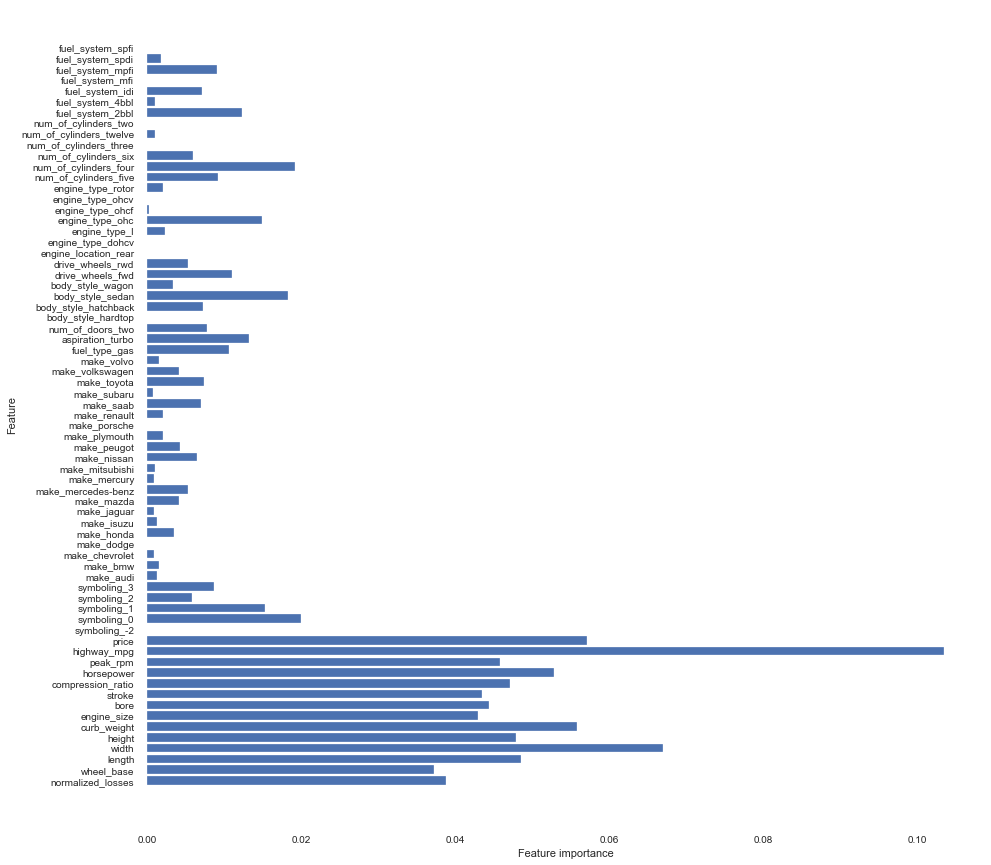

In [684]:
rfecv_features = [] 

for bool, feature in zip(rfecv_mask, X_train.columns):
    if bool:
        rfecv_features.append(feature)

print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)

n_features = X_train.shape[1]
plt.figure(figsize=(15,15))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

#### Findings:
>1. Finally, the number of features is reduced to 18 from 69, and we have the name of those features. 
>2. The next step is to double check these features by using correlation r values and VIFs to see if there's high multicollinearity between correlated features. 


#### 4.4c Reduce features further based on the results from step 4a and VIFs

**VIF (Variance Inflation Factor) Method**: Firstly we fit a model with all the variables and then calculate the variance inflation factor (VIF) for each variable. VIF measures how much the variance of an estimated regression coefficient increases if our predictors are correlated. The higher the value of VIF for ith regressor, the more it is highly correlated to other variables.

We use the statsmodels `variance_inflation_factor` to calculate VIF. There are some guidelines we can use to determine whether our VIFs are in an acceptable range. A rule of thumb commonly used in practice is if a **VIF is > 10**, you have high multicollinearity. Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features.


**Steps:**

>1. Check VIFs of all 18 features
2. Drop 'curb_weight'and check VIF of the remaining features
3. Drop 'engine_size' and 'length', and check VIF of remaining features
4. Set up a final train and test datasets with the best features


**01. Check VIF of all 18 features**

In [686]:
# narrow down the X_train to 18 features
X_train_new = X_train[['normalized_losses', 'wheel_base', 'length', 'width', 
                        'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 
                        'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 
                        'price', 'symboling_0', 'engine_type_ohc', 'num_of_cylinders_four', 
                        'fuel_system_mpfi']]
                     

In [688]:
# check all 18 features
X3 = sm.add_constant(X_train_new)

# For each X, calculate VIF and save in dataframe
vif02 = pd.DataFrame()
vif02["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif02["features"] = X3.columns
vif02.round(1)

,VIF Factor,features
0,43.1,const
1,1.5,normalized_losses
2,7.9,wheel_base
3,10.3,length
4,8.2,width
5,2.9,height
6,17.4,curb_weight
7,9.5,engine_size
8,2.7,bore
9,1.7,stroke


#### Findings:
>1. The VIF of curb_weight is 17.4, which is the highest vif value.
>2. Also, the correlation r value between width and curb_weight is 0.9.
>3. For the next step, we'll drop the curb_weight column from the train dataset.

**02. Drop 'curb_weight' and check VIF of the remaining 17 features**

In [ ]:
# this train dataset consists of 17 features after removing 'curb_weight'
X_train_new02 = X_train[['normalized_losses', 'wheel_base', 'length', 'width', 
                        'height', 'engine_size', 'bore', 'stroke', 
                        'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 
                        'price', 'symboling_0', 'engine_type_ohc', 'num_of_cylinders_four', 
                        'fuel_system_mpfi']]

X4 = sm.add_constant(X_train_new02)

# For each X, calculate VIF and save in dataframe
vif03 = pd.DataFrame()
vif03["VIF Factor"] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif03["features"] = X4.columns
vif03.round(1)

#### Findings:
>1. All VIF values are smaller than 10.
>2. However, the VIF of length is 9.7 and the VIF of engine_size is 9.3. They are very close to 10, it's not safe to keep them in the regression model.
>3. After checking with correlation coefficients r, we found that there are hign r values between engine_size and horsepower (r=0.82), between engine_size and price (r=0.89), between length and wheel_base (r=0.88),and between length and width (r=0.87).
>4. We decide to drop 'engine_size' and 'length' next. 

**03. Drop 'engine_size' and 'length', and check VIF of the remaining 15 features**

In [ ]:
# this train dataset consists of 15 features after removing 'engine_size' and 'length'
X_train_new03 = X_train[['normalized_losses', 'wheel_base', 'width', 
                        'height', 'bore', 'stroke', 
                        'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 
                        'price', 'symboling_0', 'engine_type_ohc', 'num_of_cylinders_four', 
                        'fuel_system_mpfi']]

X5 = sm.add_constant(X_train_new03)

# For each X, calculate VIF and save in dataframe
vif04 = pd.DataFrame()
vif04["VIF Factor"] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif04["features"] = X5.columns
vif04.round(1)

#### Results:
>1. All VIF values look good.
>2. Finally, the number of features is reduced to 15, they are 'normalized_losses', 'wheel_base', 'width','height', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price', 'symboling_0', 'engine_type_ohc', 'num_of_cylinders_four','fuel_system_mpfi'.
>3. The next step is to fit the models using these 15 features and check the performance.


**04. Set up a final train and test datasets with the best features**

In [697]:
# columns with 15 selected features
columns_final = ['normalized_losses', 'wheel_base', 'width', 
                        'height', 'bore', 'stroke', 
                        'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 
                        'price', 'symboling_0', 'engine_type_ohc', 'num_of_cylinders_four', 
                        'fuel_system_mpfi']

In [698]:
# X_train
X_train_final = X_train[columns_final]

In [699]:
# X_test
X_test_final = X_test[columns_final]

In [702]:
# final dataset without splitting
df_final = df_processed[['normalized_losses', 'wheel_base', 'width', 
                        'height', 'bore', 'stroke', 
                        'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 
                        'price', 'symboling_0', 'engine_type_ohc', 'num_of_cylinders_four', 
                        'fuel_system_mpfi','city_mpg']]


In [703]:
# check the results
print('Training dataset shape:', X_train_final.shape, y_train.shape)
print('Testing dataset shape:', X_test_final.shape, y_test.shape)

Training dataset shape: (143, 15) (143, 1)
Testing dataset shape: (62, 15) (62, 1)


***
### Step 5: Multiple Linear Regression

Since there are 15 independent variabls have been selected from the last step, we'll conduct multiple linear regression to predict the city-mpg :

> $y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

* $y$ is the response
* $x_1 ... x_n$ is the features
* $\beta_0$ is the intercept
* $\beta_1 ... \beta_n$ is the coefficients for x

#### The procedures of this step include:
- 1. Model selection
- 2. Test the model to predict using the test dataset
- 3. Use Statsmodels summary to get the final model's P-value, $R^2$, intercept, and coefficients.
- 4. Use the final Model for Prediction

#### Backward elimination

Backward elimination, which involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically insignificant loss of fit. (https://en.wikipedia.org/wiki/Stepwise_regression)

**Model evaluation:**

We'll evaluate the model by using the mean accuracy score of 10-fold cross-validation, the p-value, and the adjusted $R^2$.

##### 01. 10-fold cross-validation

The `cross_val_score` is the function of the model selection and evaluate a score by cross-validation. we use **10-fold cross-validation model** that divides the training set into 10-folds and the model is trained a nine-fold and tested on the last remaining fold. We'll use the average accuracy scores derived from the 10-fold process to compare the models and select the best model. We'll get 10 accuracies and actually enough to get a relevant idea of the model performance.

##### 02. P-value

The p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis. 

**In this study, we'll use `statsmodels` to display OLS model summary that includes the p-value and the adjusted $R^2$.** 

(https://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/)

##### 03. Adjusted $R^2$
In a regression model that has more independent variables, $R^2$ would always increase as predictors are added to the regression model even if this increase are not actually improving the model’s fit. 

To remedy this, the adjusted $R^2$ will help determine how reliable the correlation is and how much is determined by the addition of independent variables. The adjusted $R^2$ compensates for the addition of variables and only increases if the new predictor enhances the model above what would be obtained by probability.


#### Models: 

>01. model01 = Build a full model on ALL features
>02. model02 = Build a model on features having significant p values (p<.05)


***
#### 1. Model Selection

**a. Model 01:** 

All 15 features: 'normalized_losses', 'wheel_base', 'width','height', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg', 'price', 'symboling_0', 'engine_type_ohc', 'num_of_cylinders_four','fuel_system_mpfi'.

In [706]:
# Build a model on ALL 15 features.
# Instantiate model
model01 = LinearRegression()

# fit the model using 10-fold cross validation
scores01 = cross_val_score(model01, X_train_final, y_train, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores01)

# calculate the average accuracy across all 10 folds
print('Mean Accuracy:', np.mean(scores01))

[0.96868882 0.84483843 0.92723728 0.96226517 0.93384952 0.9643412
 0.96348497 0.94776391 0.95532095 0.94697559]
Mean Accuracy: 0.9414765838844337


In [707]:
# compute with statsmodels, by adding intercept manually
X10 = sm.add_constant(X_train_final)
result = sm.OLS(y_train, X10).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     221.1
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           3.09e-83
Time:                        13:11:30   Log-Likelihood:                -238.68
No. Observations:                 143   AIC:                             509.4
Df Residuals:                     127   BIC:                             556.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    25.64

#### Results:
>1. For this model, some independent variables cannot significantly predict the dependent variable because their p value greater than 0.05. 
>2. From the warnings of the above OLS summary, there are some multicollinearity.
>3. Next, we'll drop the features having p>.05 from the model.

**b. Model02**

From the last step, there are five features with p<.05, they are: 'wheel_base','horsepower','highway_mpg','engine_type_ohc','fuel_system_mpfi'

In [745]:
X_train02 = X_train_final[['wheel_base','horsepower','highway_mpg','engine_type_ohc','fuel_system_mpfi']]

# Instantiate model
model02 = LinearRegression()

# fit the model using 10-fold cross validation
scores02 = cross_val_score(model02, X_train02, y_train, cv=10)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores02)

# calculate the average accuracy across all 10 folds
print('Mean Accuracy:', np.mean(scores02))


[0.97055881 0.84071653 0.92422667 0.9741473  0.93805587 0.96357673
 0.95184223 0.95452417 0.94909537 0.96073174]
Mean Accuracy: 0.9427475409808574


In [743]:
# compute with statsmodels, by adding intercept manually
X11 = sm.add_constant(X_train02)
result02 = sm.OLS(y_train, X11).fit()
print(result02.summary())

                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     654.4
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           9.90e-94
Time:                        17:01:49   Log-Likelihood:                -244.83
No. Observations:                 143   AIC:                             501.7
Df Residuals:                     137   BIC:                             519.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               26.1337      0.273  

#### Results:
>1. All p values in this model are less than 0.05, which means they can significantly predict the dependent variable.
>2. The multicollinearity warning disappeared.

**c. Model evaluation:**

##### 01. Average cross validated accurac score

In [730]:
print('model01-cross validated accuracy:',np.mean(scores01)*100, '%')
print('model02-cross validated accuracy:',np.mean(scores02)*100, '%')

model01-cross validated accuracy: 94.14765838844336 %
model02-cross validated accuracy: 94.27475409808575 %


##### 02. Adjusted $R^2$

In [731]:
print("model01- rsquared_adj\n",result.rsquared_adj)
print("model02- rsquared_adj\n",result02.rsquared_adj)

model01- rsquared_adj
 0.9587696096543552
model02- rsquared_adj
 0.958345896492116


#### Results:
>1. For the average cross validated accurac score: the score of model01 is 94.15%, the score of model02 is 94.27%. Therefore, the model02 has the best accurac score.
>2. For Adjusted $R^2$, the model01 is 0.9588, the model02 is 0.9583. The first model has 15 independent variables and the second model has 5 independent variables. That means the removed ten features are not helpful in explaining the output variable.
>3. Therefore, the model02 with the features of 'wheel_base','horsepower','highway_mpg','engine_type_ohc','fuel_system_mpfi' is the best model.
***
#### 2. Test the model to predict using the test dataset

Text(0, 0.5, 'Predictions')

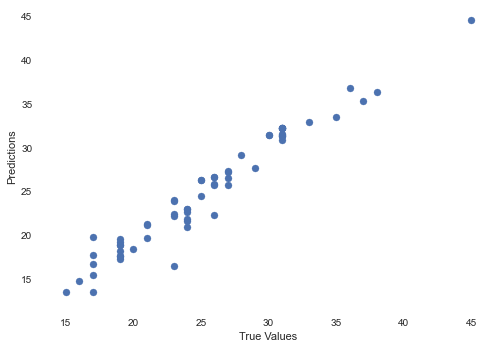

In [741]:
# Fit model
model02.fit(X_train02, y_train) 
# Predict using test dataset
y_pred = model02.predict(X_test02)
#visualize the prediction
plt.scatter(y_test,y_pred)

plt.xlabel('True Values')
plt.ylabel('Predictions')

#### Result:
>The above figure shows a scatterplot for Predicted values vs. Actual values.
To have a good fit, the plot should resemble a straight line at 45 degrees. As you see from the above plot, all the points are close to the line.

#### 3. Get model02's P-value,  $R^2$, intercept, and coefficients.
We'll pull the OLS summary of model02 again here.


In [749]:
print("summary()\n",result02.summary())

summary()
                             OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     654.4
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           9.90e-94
Time:                        17:03:44   Log-Likelihood:                -244.83
No. Observations:                 143   AIC:                             501.7
Df Residuals:                     137   BIC:                             519.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               26.1337  

#### Results:

1. P < .05 - these independent variables statistically significantly predicted electrical energy output, p < .05
2.  $R^2$ = .96 - all three independent variables explain 96% of the variability of the dependent variable
3. $\beta_0 $ (intercept) = 26.1337
4. $\beta_1 $ (coefficient of wheel_base) = 0.5498
5. $\beta_2 $ (coefficient of horsepower) = -0.4303
6. $\beta_3 $ (coefficient of highway_mpg) = 6.2379
7. $\beta_4 $ (coefficient of engine_type_ohc) = -0.6618
8. $\beta_5 $ (coefficient of fuel_system_mpfi) = -1.2086


#### 4. Use the final Model for Prediction


$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

In this case:

$y = \beta_0 + \beta_1 \times wheel base + \beta_2 \times horsepower + \beta_3 \times highway mpg + \beta_4 \times engine type ohc + \beta_5 \times fuel system mpfi $

> ## **Final Model:**

>$ cityMPG = 26.1337 + 0.5498 \times wheel base - 0.4303 \times horsepower + 6.2379 \times highway mpg - 0.6618 \times engine type ohc - 1.2086 \times fuel system mpfi$


***
### Conclusion:

#### Research Question: To what extent does independent variables predict the average miles-per-gallon (MPG) for your car in the city ?

A multiple linear regression was run to predict the average MPG for your car in the city from wheel_base, horsepower, highway_mpg, engine_type_ohc, and fuel_system_mpfi. These variables statistically significantly predicted city_mpg, p < .05, $R^2$ = .96. All five independent variables explain 96% of the variability of the dependent variable - MPG in the city.

City MPG refers to driving with occasional stopping and braking, simulating the conditions you're likely to run into while driving on city streets.

Among these 5 independent variables, wheel_base and highway_mpg are positively correlated with city MOG. A car with the longer distance between the centers of the front and rear wheels will positively affect the average miles-per-gallon in the city. Also, when a car has a more average MPG on the highway, this car will have a more average MPG in the city.

The features of horsepower, engine_type_ohc, and fuel_system_mpfi are negatively correlated with city MPG. The average MPG for a car in the city is reduced when the engine's power of a car is getting higher. Also, the overhead camshaft (OHC) engine can reduce the average MPG for a car in the city. Furthermore, the Multi Point Fuel Injection (MPFI) system of a car can reduce the average MPG for a car in the city.

In other words, if we'd like to choose a car with a higher city MPG, we should pick one with a larger wheel base, a higher highway MPG, and a lower engine's power. Also, a car with the overhead camshaft (OHC) engine or with the Multi Point Fuel Injection (MPFI) system is not a good choice.

